In [3]:
import torch
import torch.optim as optim
import torch.nn as nn

In [4]:
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c).unsqueeze(1)
t_u = torch.tensor(t_u).unsqueeze(1)

In [5]:
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

In [6]:
t_u_train = t_u[train_indices]
t_c_train = t_c[train_indices]

t_u_val = t_u[val_indices]
t_c_val = t_c[val_indices]

t_un_train = 0.1 * t_u_train
t_un_val = 0.1 * t_u_val

# 1
## (a)

In [7]:
def training_loop(n_epochs, optimizer, model, loss_fn, t_u_train, t_u_val, t_c_train, t_c_val):
    for epoch in range(1, n_epochs + 1):
        t_p_train = model(t_u_train)
        loss_train = loss_fn(t_p_train, t_c_train)
        
        t_p_val = model(t_u_val)
        loss_val = loss_fn(t_p_val, t_c_val)
        
        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()
        
        if epoch == 1 or epoch % 1000 == 0:
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f}, Validation loss {loss_val.item():.4f}")

隠れ層の数を2つにする

In [8]:
from collections import OrderedDict

seq_model = nn.Sequential(OrderedDict([
    ("hidden_linear", nn.Linear(1, 2)),
    ("hidden_activation", nn.Tanh()),
    ("output_linear", nn.Linear(2, 1))
]))

In [9]:
optimizer = optim.SGD(seq_model.parameters(), lr=1e-3)

training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    model = seq_model,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val,
    t_c_train = t_c_train,
    t_c_val = t_c_val)

print("output", seq_model(t_un_val))
print("answer", t_c_val)
print("hidden", seq_model.hidden_linear.weight.grad)

Epoch 1, Training loss 215.9439, Validation loss 126.0079
Epoch 1000, Training loss 15.1952, Validation loss 8.7178
Epoch 2000, Training loss 10.1114, Validation loss 3.3286
Epoch 3000, Training loss 4.3208, Validation loss 2.1876
Epoch 4000, Training loss 2.9821, Validation loss 2.3168
Epoch 5000, Training loss 2.5762, Validation loss 2.4790
output tensor([[ 0.2317],
        [11.5736]], grad_fn=<AddmmBackward0>)
answer tensor([[ 3.],
        [15.]])
hidden tensor([[22.9291],
        [48.4435]])


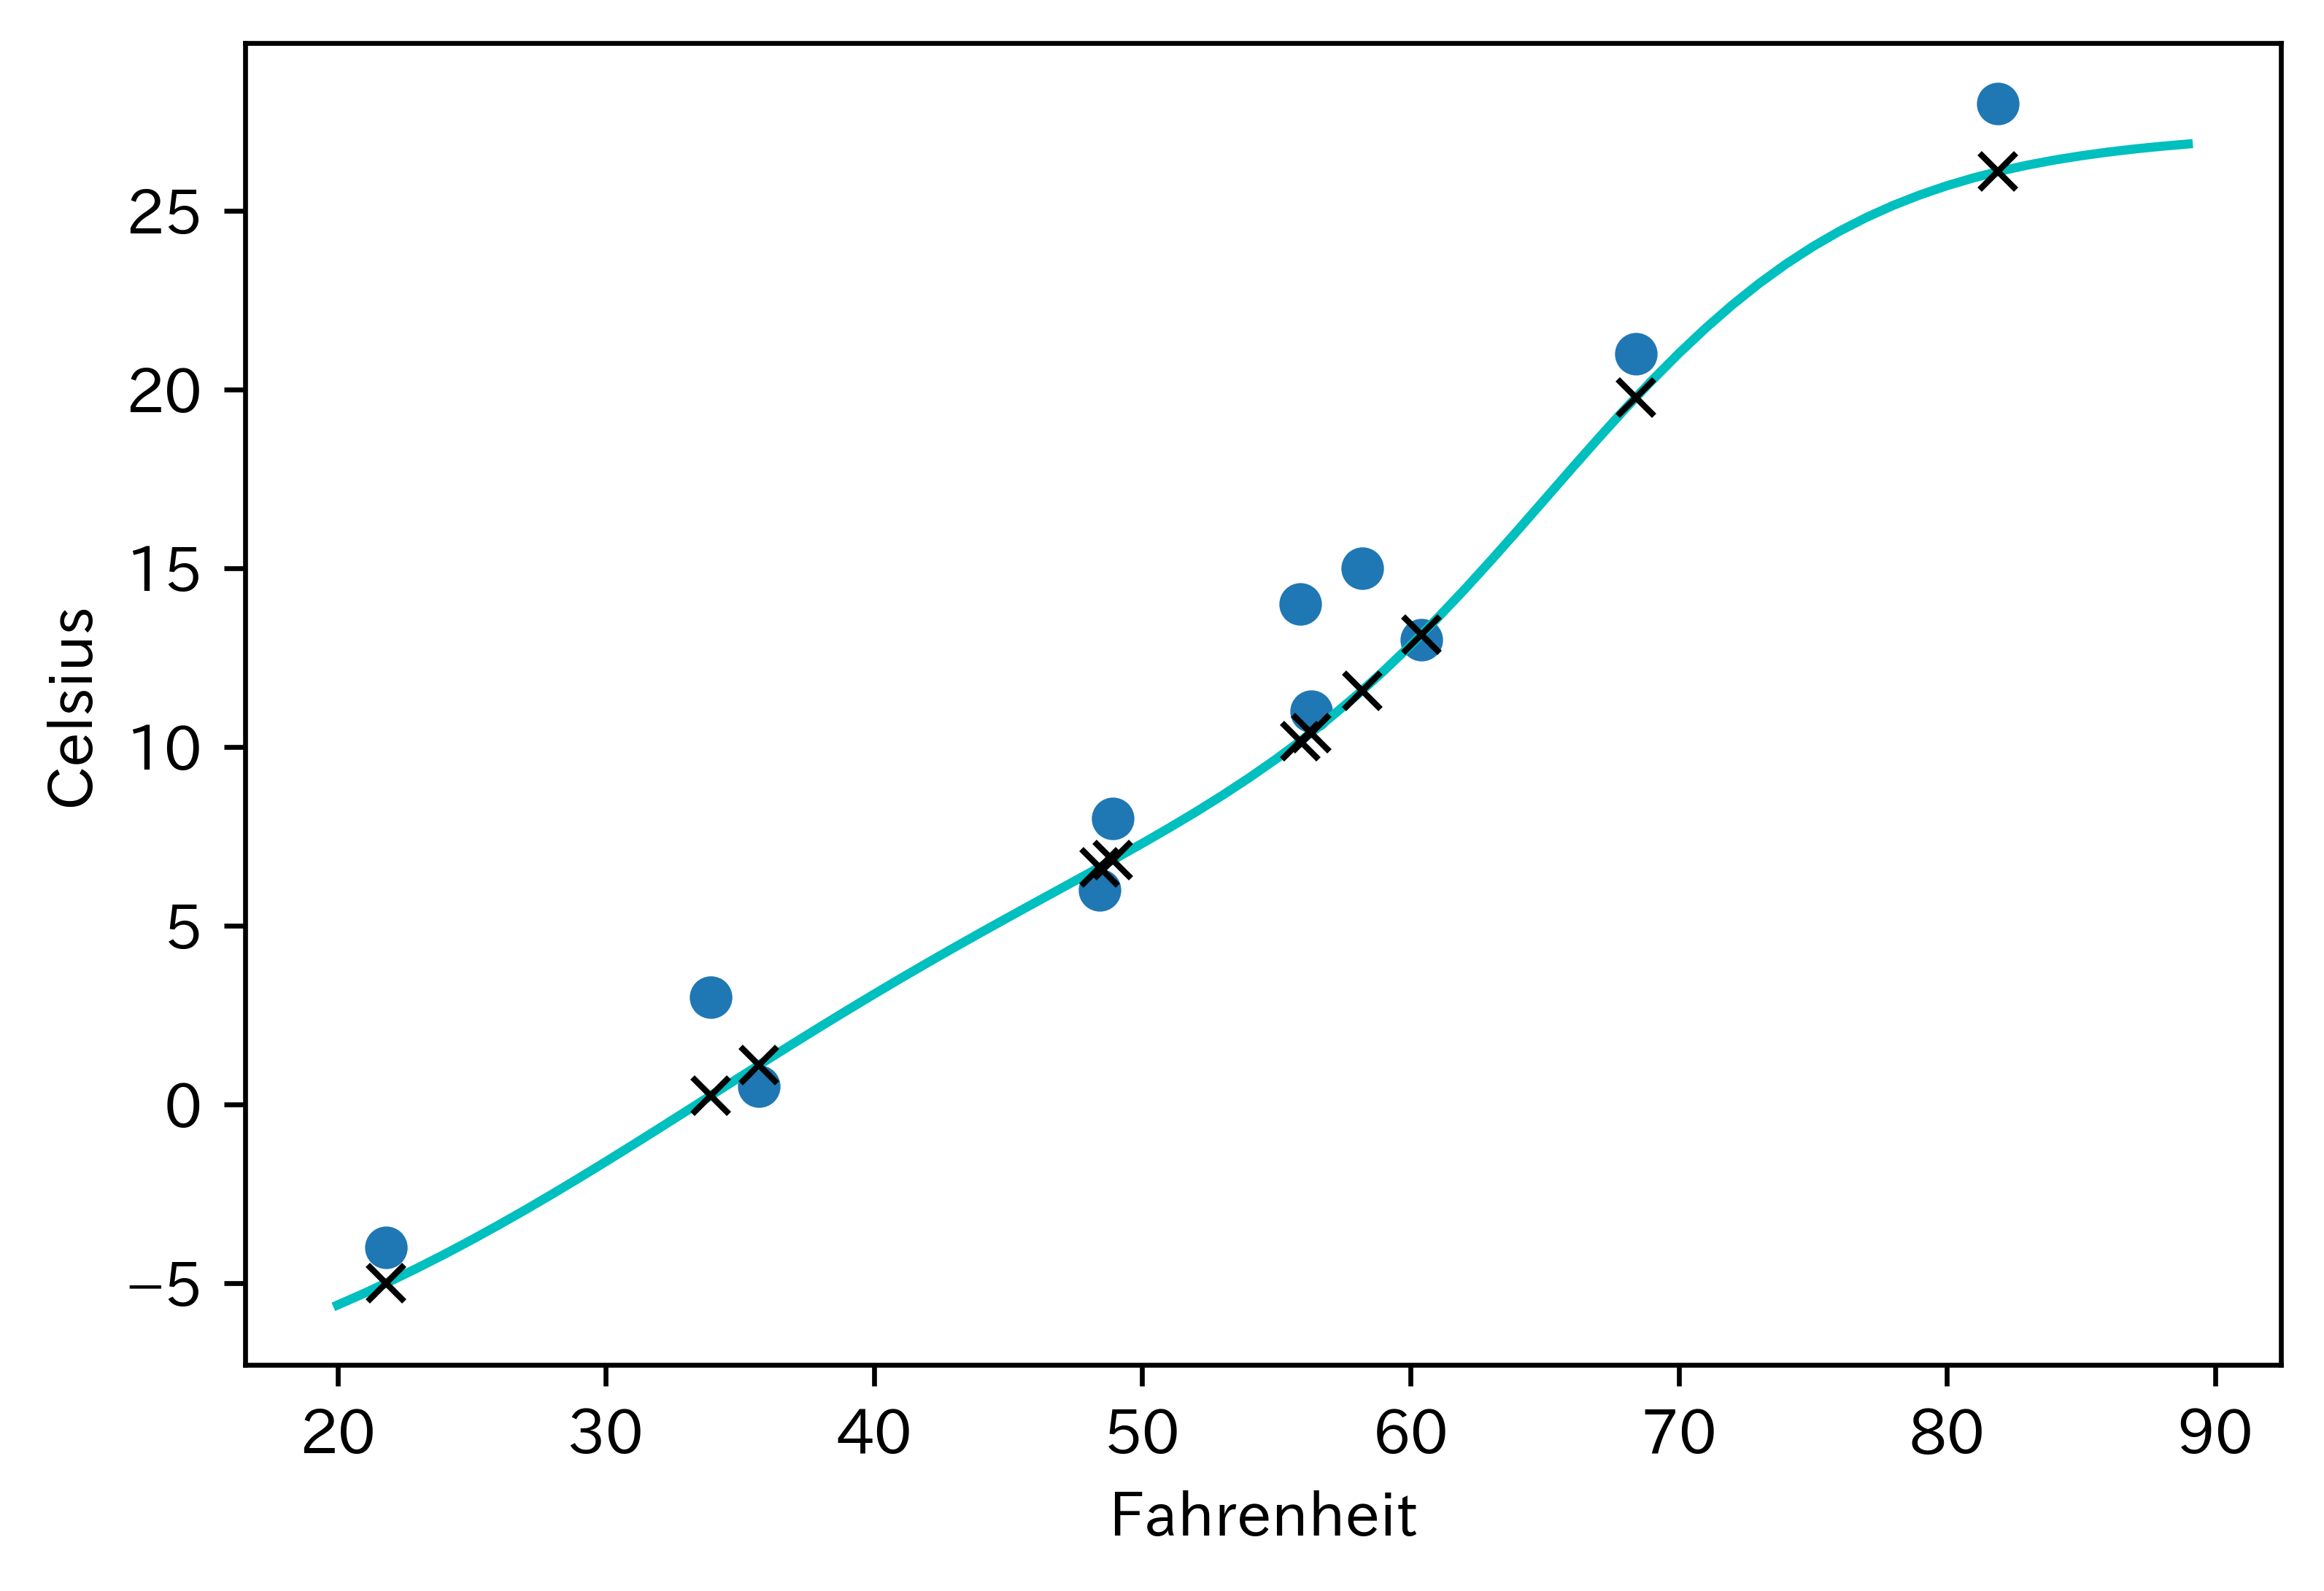

In [10]:
from matplotlib import pyplot as plt

t_range = torch.arange(20., 90.).unsqueeze(1)

fig = plt.figure(dpi=600)

plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.plot(t_u.numpy(), t_c.numpy(),  "o")
plt.plot(t_range.numpy(), seq_model(0.1 * t_range).detach().numpy(), "c-")
plt.plot(t_u.numpy(), seq_model(0.1 * t_u).detach().numpy(), "kx")

隠れ層が減った方が非線形で複雑な形になっている

隠れ層を16にする

In [11]:
from collections import OrderedDict

seq_model = nn.Sequential(OrderedDict([
    ("hidden_linear", nn.Linear(1, 16)),
    ("hidden_activation", nn.Tanh()),
    ("output_linear", nn.Linear(16, 1))
]))

In [12]:
optimizer = optim.SGD(seq_model.parameters(), lr=1e-3)

training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    model = seq_model,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val,
    t_c_train = t_c_train,
    t_c_val = t_c_val)

print("output", seq_model(t_un_val))
print("answer", t_c_val)
print("hidden", seq_model.hidden_linear.weight.grad)

Epoch 1, Training loss 181.6756, Validation loss 100.0652
Epoch 1000, Training loss 3.2915, Validation loss 6.3831
Epoch 2000, Training loss 2.8837, Validation loss 3.7283
Epoch 3000, Training loss 1.7594, Validation loss 4.3526
Epoch 4000, Training loss 1.4292, Validation loss 4.9036
Epoch 5000, Training loss 1.3240, Validation loss 5.3138
output tensor([[-0.0776],
        [12.9781]], grad_fn=<AddmmBackward0>)
answer tensor([[ 3.],
        [15.]])
hidden tensor([[ 4.0405e-03],
        [ 3.1202e+00],
        [ 4.3642e+00],
        [ 5.0150e+00],
        [-5.4291e+00],
        [ 5.1276e+00],
        [-1.0836e-01],
        [ 5.5165e+00],
        [ 5.7132e-02],
        [-2.3863e+00],
        [ 4.6131e-02],
        [-3.0112e+00],
        [-9.8148e-02],
        [ 2.6127e-02],
        [ 5.5353e+00],
        [-2.3091e+00]])


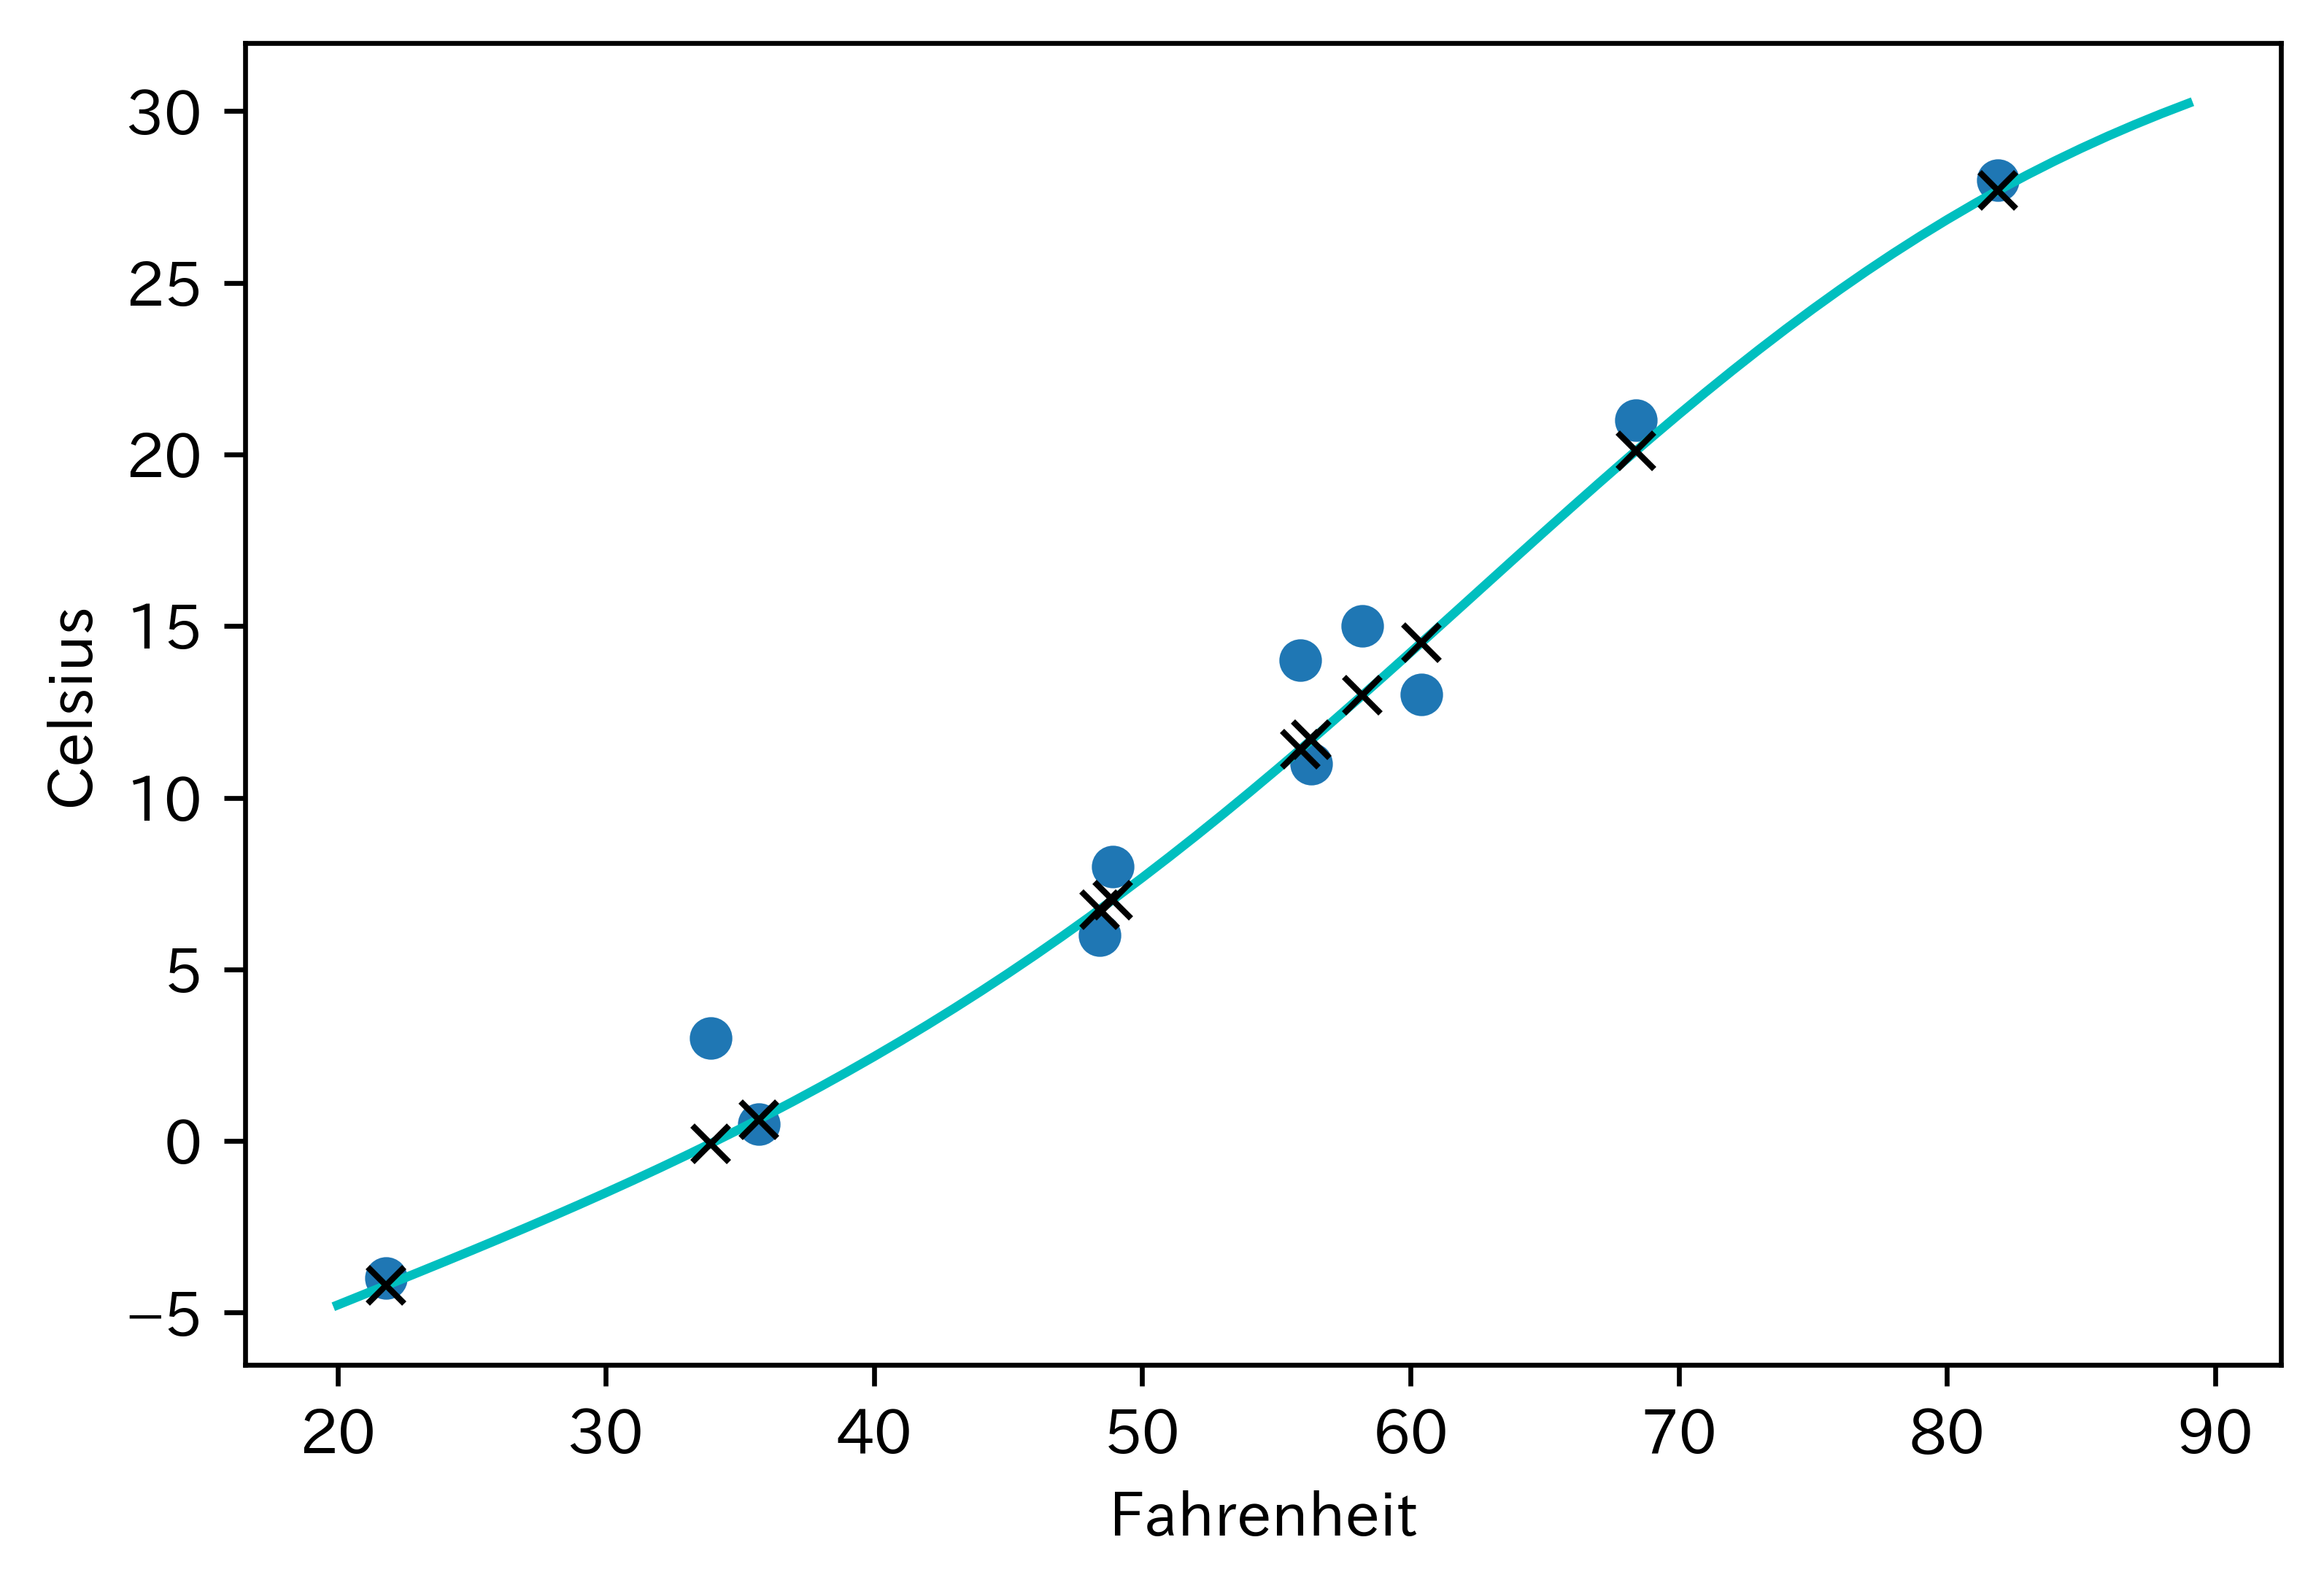

In [13]:
from matplotlib import pyplot as plt

t_range = torch.arange(20., 90.).unsqueeze(1)

fig = plt.figure(dpi=600)

plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.plot(t_u.numpy(), t_c.numpy(),  "o")
plt.plot(t_range.numpy(), seq_model(0.1 * t_range).detach().numpy(), "c-")
plt.plot(t_u.numpy(), seq_model(0.1 * t_u).detach().numpy(), "kx")

あまり隠れそう8の場合と変わらない

学習率をさらに減らす

In [14]:
from collections import OrderedDict

seq_model = nn.Sequential(OrderedDict([
    ("hidden_linear", nn.Linear(1, 8)),
    ("hidden_activation", nn.Tanh()),
    ("output_linear", nn.Linear(8, 1))
]))

In [15]:
optimizer = optim.SGD(seq_model.parameters(), lr=1e-4)

training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    model = seq_model,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val,
    t_c_train = t_c_train,
    t_c_val = t_c_val)

print("output", seq_model(t_un_val))
print("answer", t_c_val)
print("hidden", seq_model.hidden_linear.weight.grad)

Epoch 1, Training loss 190.8304, Validation loss 107.6404
Epoch 1000, Training loss 70.8401, Validation loss 25.1171
Epoch 2000, Training loss 47.7909, Validation loss 13.7332
Epoch 3000, Training loss 31.7310, Validation loss 6.0342
Epoch 4000, Training loss 20.5019, Validation loss 2.4174
Epoch 5000, Training loss 13.5405, Validation loss 2.1355
output tensor([[ 1.8448],
        [13.2859]], grad_fn=<AddmmBackward0>)
answer tensor([[ 3.],
        [15.]])
hidden tensor([[-0.2171],
        [-0.0652],
        [ 0.1266],
        [-0.1906],
        [ 0.2293],
        [ 0.2129],
        [ 0.1769],
        [-0.1071]])


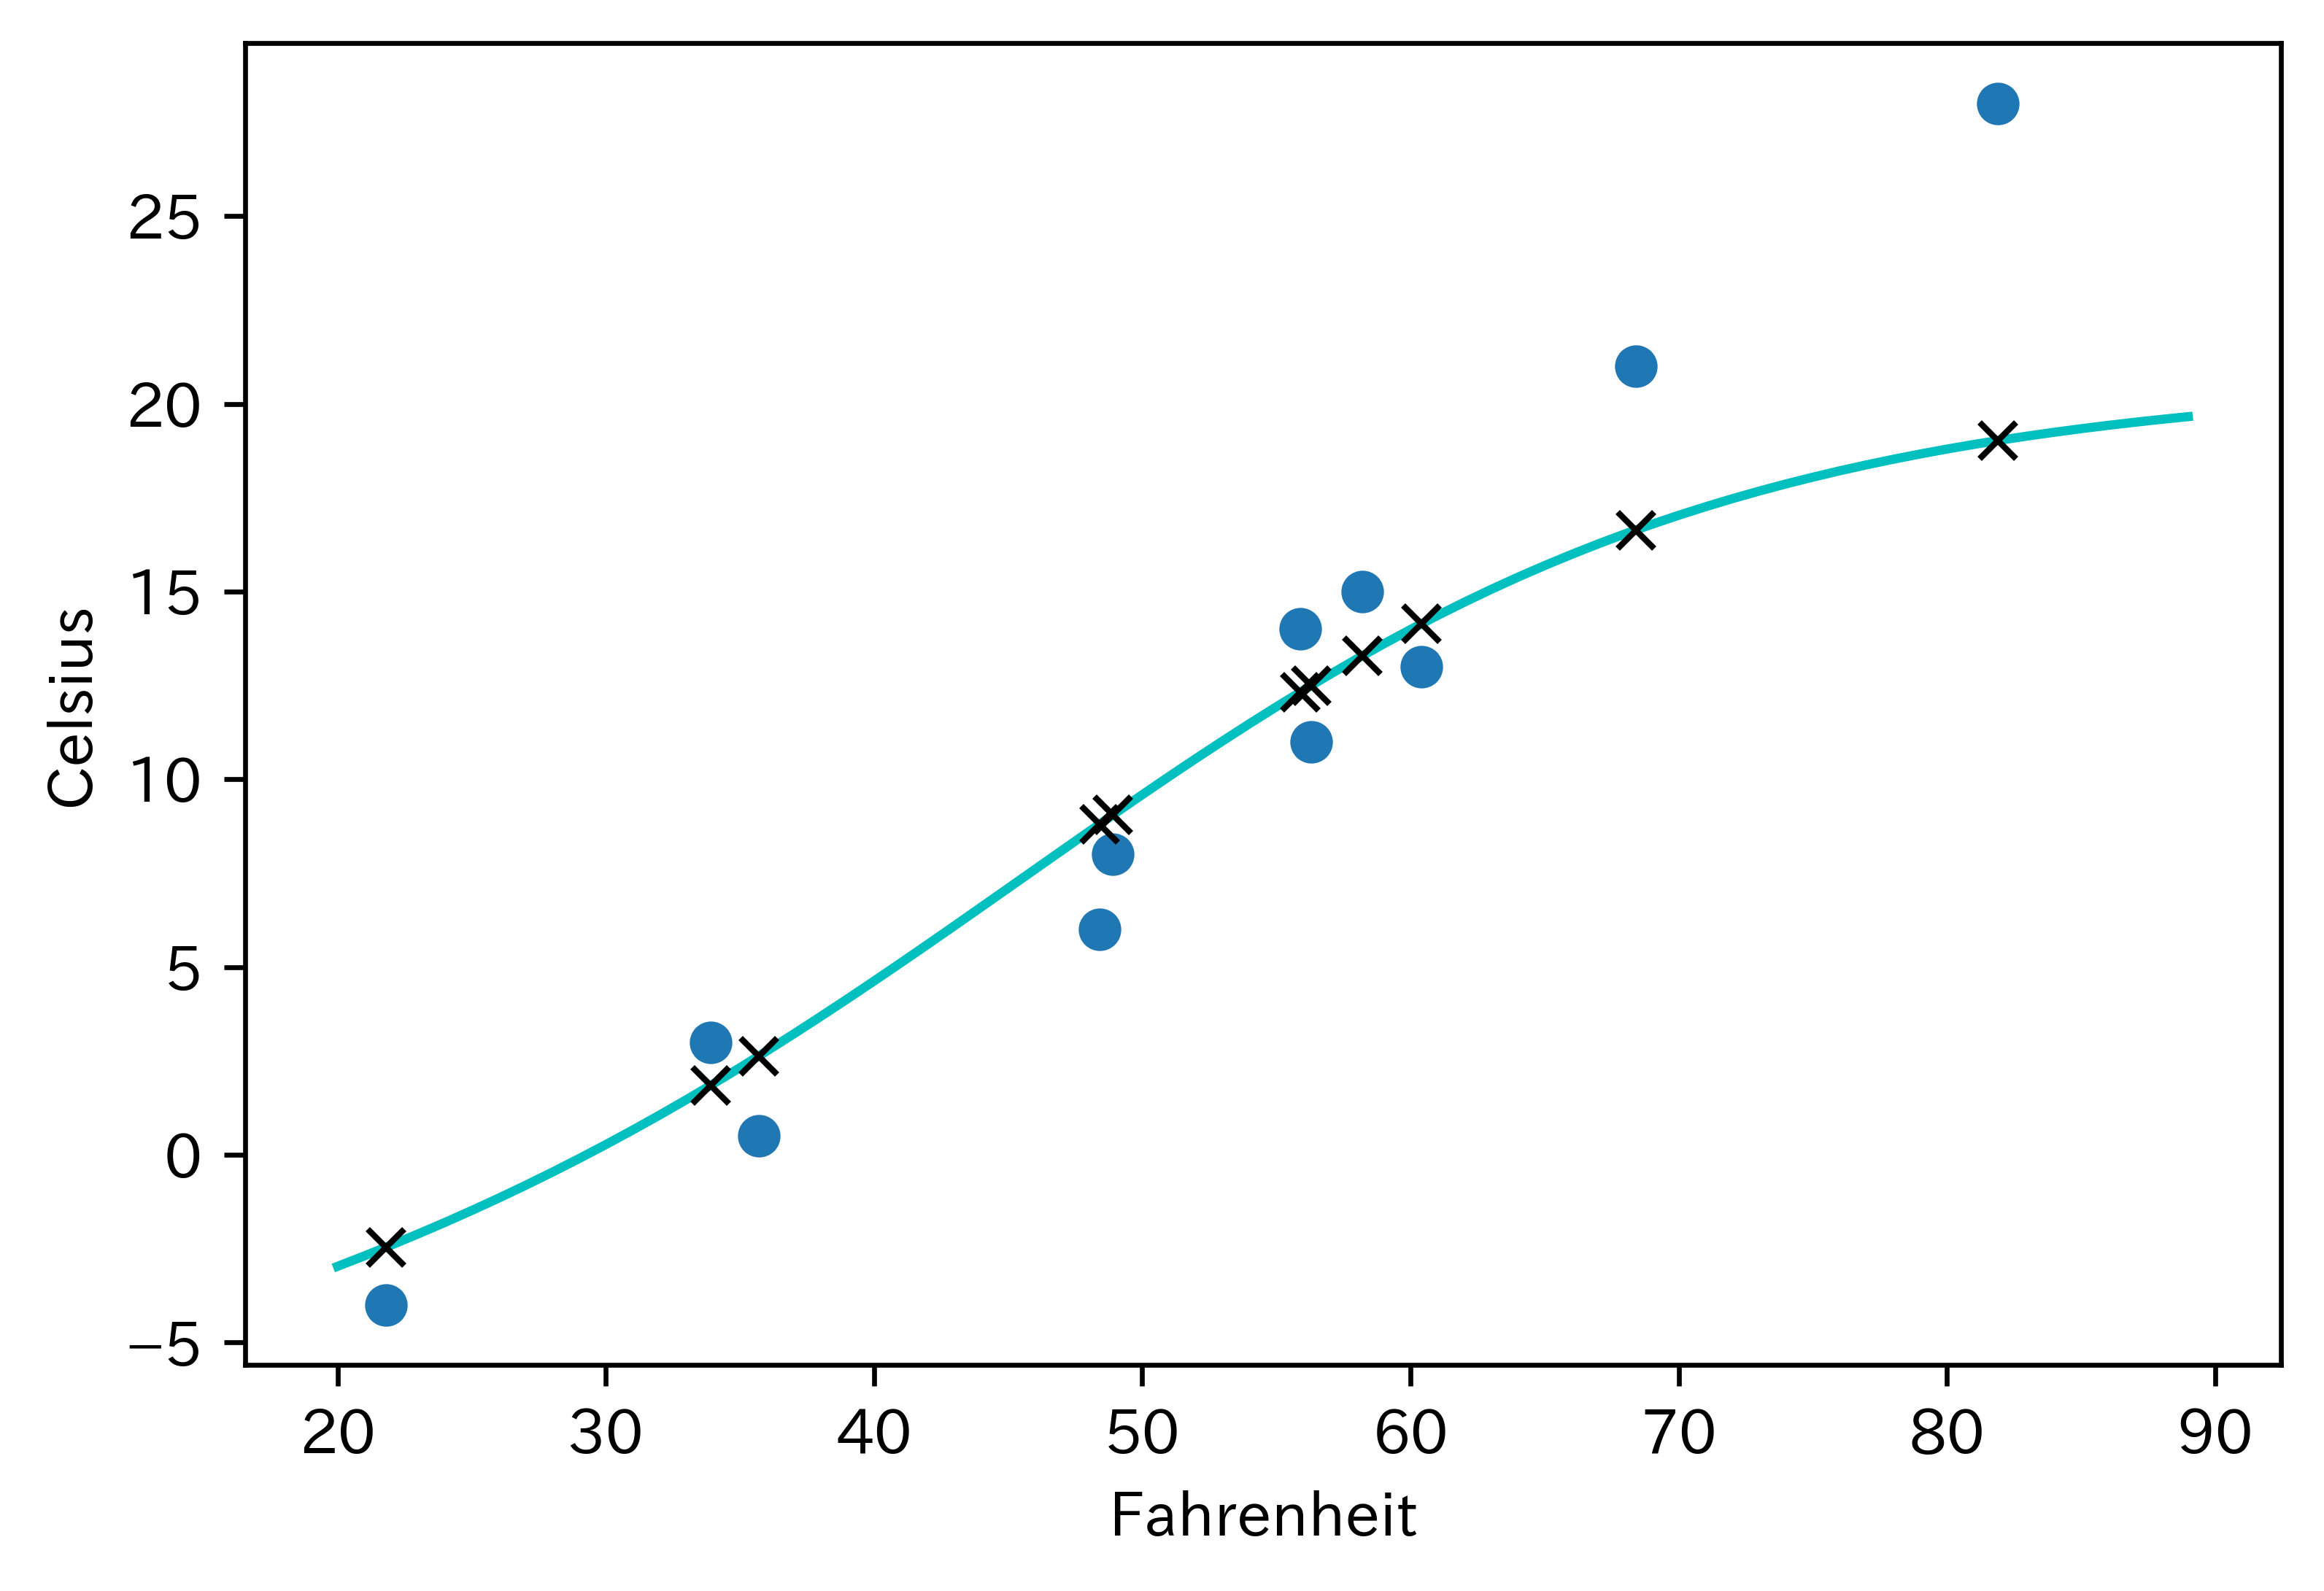

In [16]:
from matplotlib import pyplot as plt

t_range = torch.arange(20., 90.).unsqueeze(1)

fig = plt.figure(dpi=600)

plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.plot(t_u.numpy(), t_c.numpy(),  "o")
plt.plot(t_range.numpy(), seq_model(0.1 * t_range).detach().numpy(), "c-")
plt.plot(t_u.numpy(), seq_model(0.1 * t_u).detach().numpy(), "kx")

温度が高い2つが外れ値のように扱われている

学習率を上げる

In [17]:
from collections import OrderedDict

seq_model = nn.Sequential(OrderedDict([
    ("hidden_linear", nn.Linear(1, 8)),
    ("hidden_activation", nn.Tanh()),
    ("output_linear", nn.Linear(8, 1))
]))

In [18]:
optimizer = optim.SGD(seq_model.parameters(), lr=1e-2)

training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    model = seq_model,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val,
    t_c_train = t_c_train,
    t_c_val = t_c_val)

print("output", seq_model(t_un_val))
print("answer", t_c_val)
print("hidden", seq_model.hidden_linear.weight.grad)

Epoch 1, Training loss 181.0681, Validation loss 99.4583
Epoch 1000, Training loss 20.6257, Validation loss 8.6941
Epoch 2000, Training loss 41.8014, Validation loss 5.2361
Epoch 3000, Training loss 39.2833, Validation loss 15.9717
Epoch 4000, Training loss 39.2587, Validation loss 15.4532
Epoch 5000, Training loss 39.4113, Validation loss 11.2513
output tensor([[-1.7013],
        [14.3194]], grad_fn=<AddmmBackward0>)
answer tensor([[ 3.],
        [15.]])
hidden tensor([[ 5.8615e-03],
        [ 0.0000e+00],
        [-5.9882e-03],
        [-3.9174e-05],
        [ 6.2459e-01],
        [ 4.3883e-02],
        [ 3.1702e-02],
        [-2.2355e-05]])


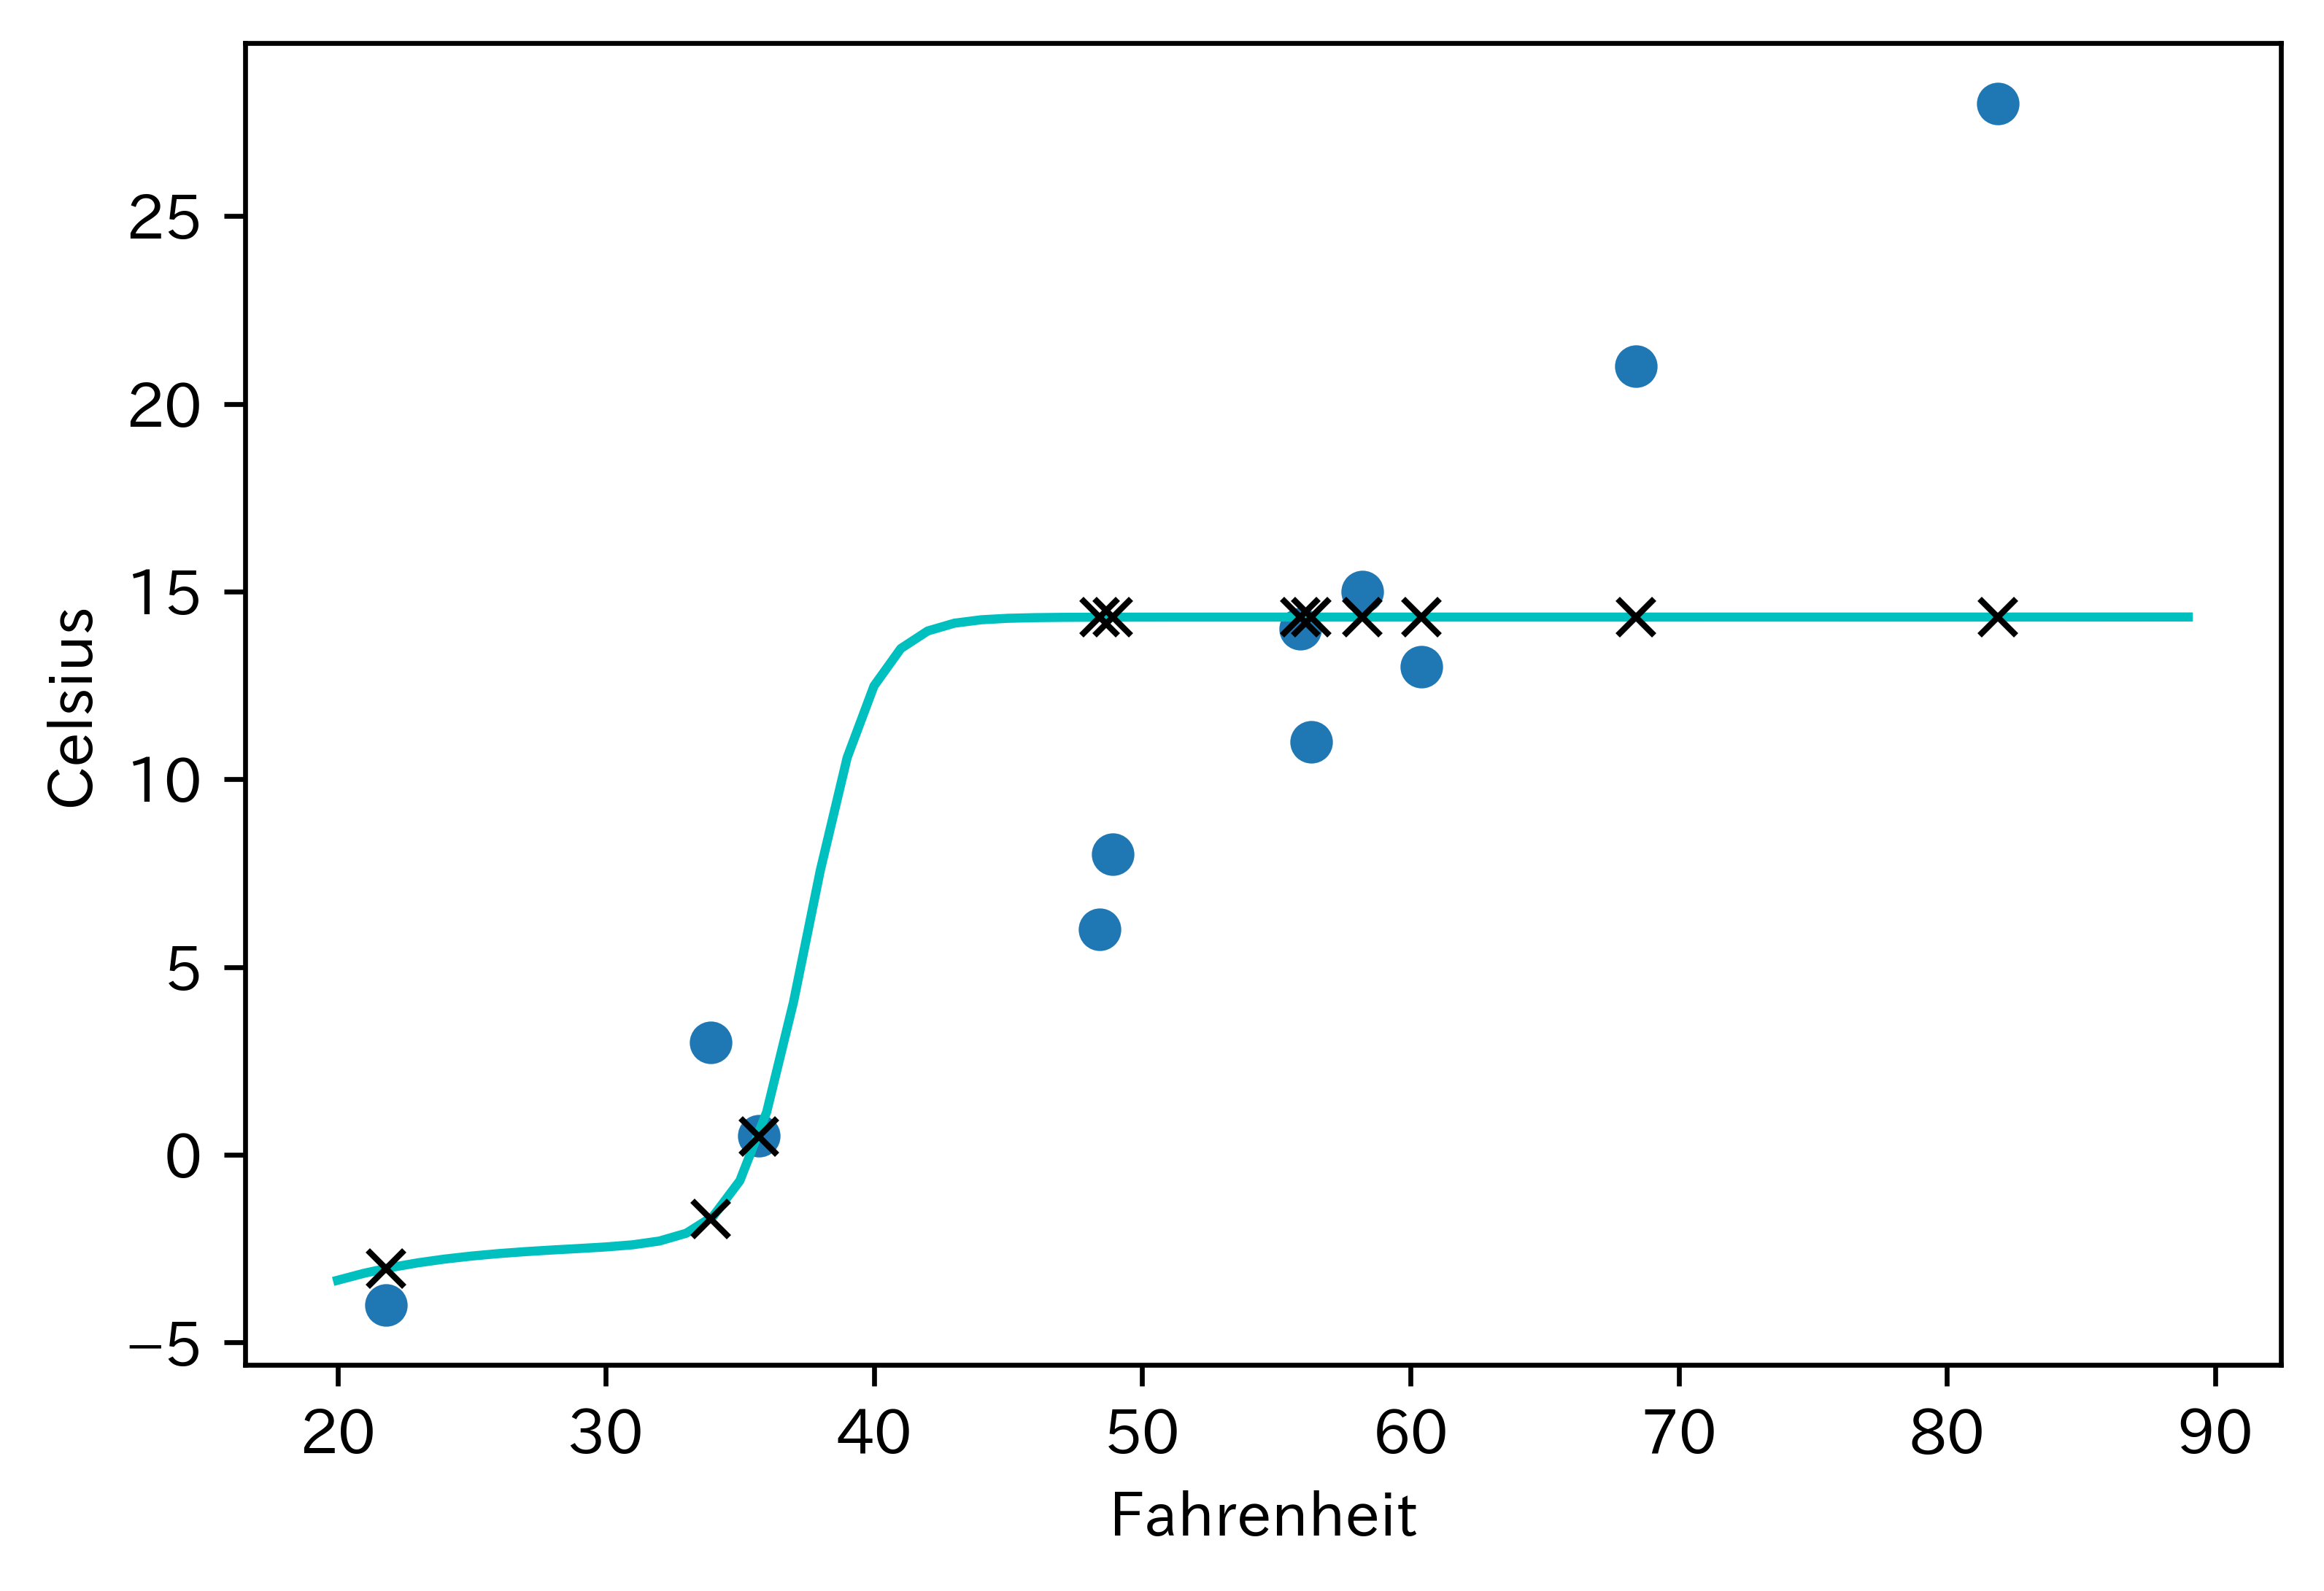

In [19]:
from matplotlib import pyplot as plt

t_range = torch.arange(20., 90.).unsqueeze(1)

fig = plt.figure(dpi=600)

plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.plot(t_u.numpy(), t_c.numpy(),  "o")
plt.plot(t_range.numpy(), seq_model(0.1 * t_range).detach().numpy(), "c-")
plt.plot(t_u.numpy(), seq_model(0.1 * t_u).detach().numpy(), "kx")

うまく学習が進まず、床関数のようになっている

学習率を落とし、loopの回数を増やしてみる

In [20]:
from collections import OrderedDict

seq_model = nn.Sequential(OrderedDict([
    ("hidden_linear", nn.Linear(1, 8)),
    ("hidden_activation", nn.Tanh()),
    ("output_linear", nn.Linear(8, 1))
]))

In [21]:
optimizer = optim.SGD(seq_model.parameters(), lr=1e-4)

training_loop(
    n_epochs = 50000,
    optimizer = optimizer,
    model = seq_model,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val,
    t_c_train = t_c_train,
    t_c_val = t_c_val)

print("output", seq_model(t_un_val))
print("answer", t_c_val)
print("hidden", seq_model.hidden_linear.weight.grad)

Epoch 1, Training loss 202.2499, Validation loss 116.1260
Epoch 1000, Training loss 77.7675, Validation loss 29.1404
Epoch 2000, Training loss 58.8366, Validation loss 20.4092
Epoch 3000, Training loss 41.6808, Validation loss 10.9803
Epoch 4000, Training loss 26.2019, Validation loss 3.9323
Epoch 5000, Training loss 16.5963, Validation loss 2.0330
Epoch 6000, Training loss 11.3998, Validation loss 2.6565
Epoch 7000, Training loss 8.5253, Validation loss 3.8826
Epoch 8000, Training loss 6.8306, Validation loss 4.8700
Epoch 9000, Training loss 5.7150, Validation loss 5.4619
Epoch 10000, Training loss 4.9011, Validation loss 5.7488
Epoch 11000, Training loss 4.2627, Validation loss 5.8545
Epoch 12000, Training loss 3.7408, Validation loss 5.8823
Epoch 13000, Training loss 3.3095, Validation loss 5.8961
Epoch 14000, Training loss 2.9554, Validation loss 5.9130
Epoch 15000, Training loss 2.6666, Validation loss 5.9268
Epoch 16000, Training loss 2.4312, Validation loss 5.9317
Epoch 17000, T

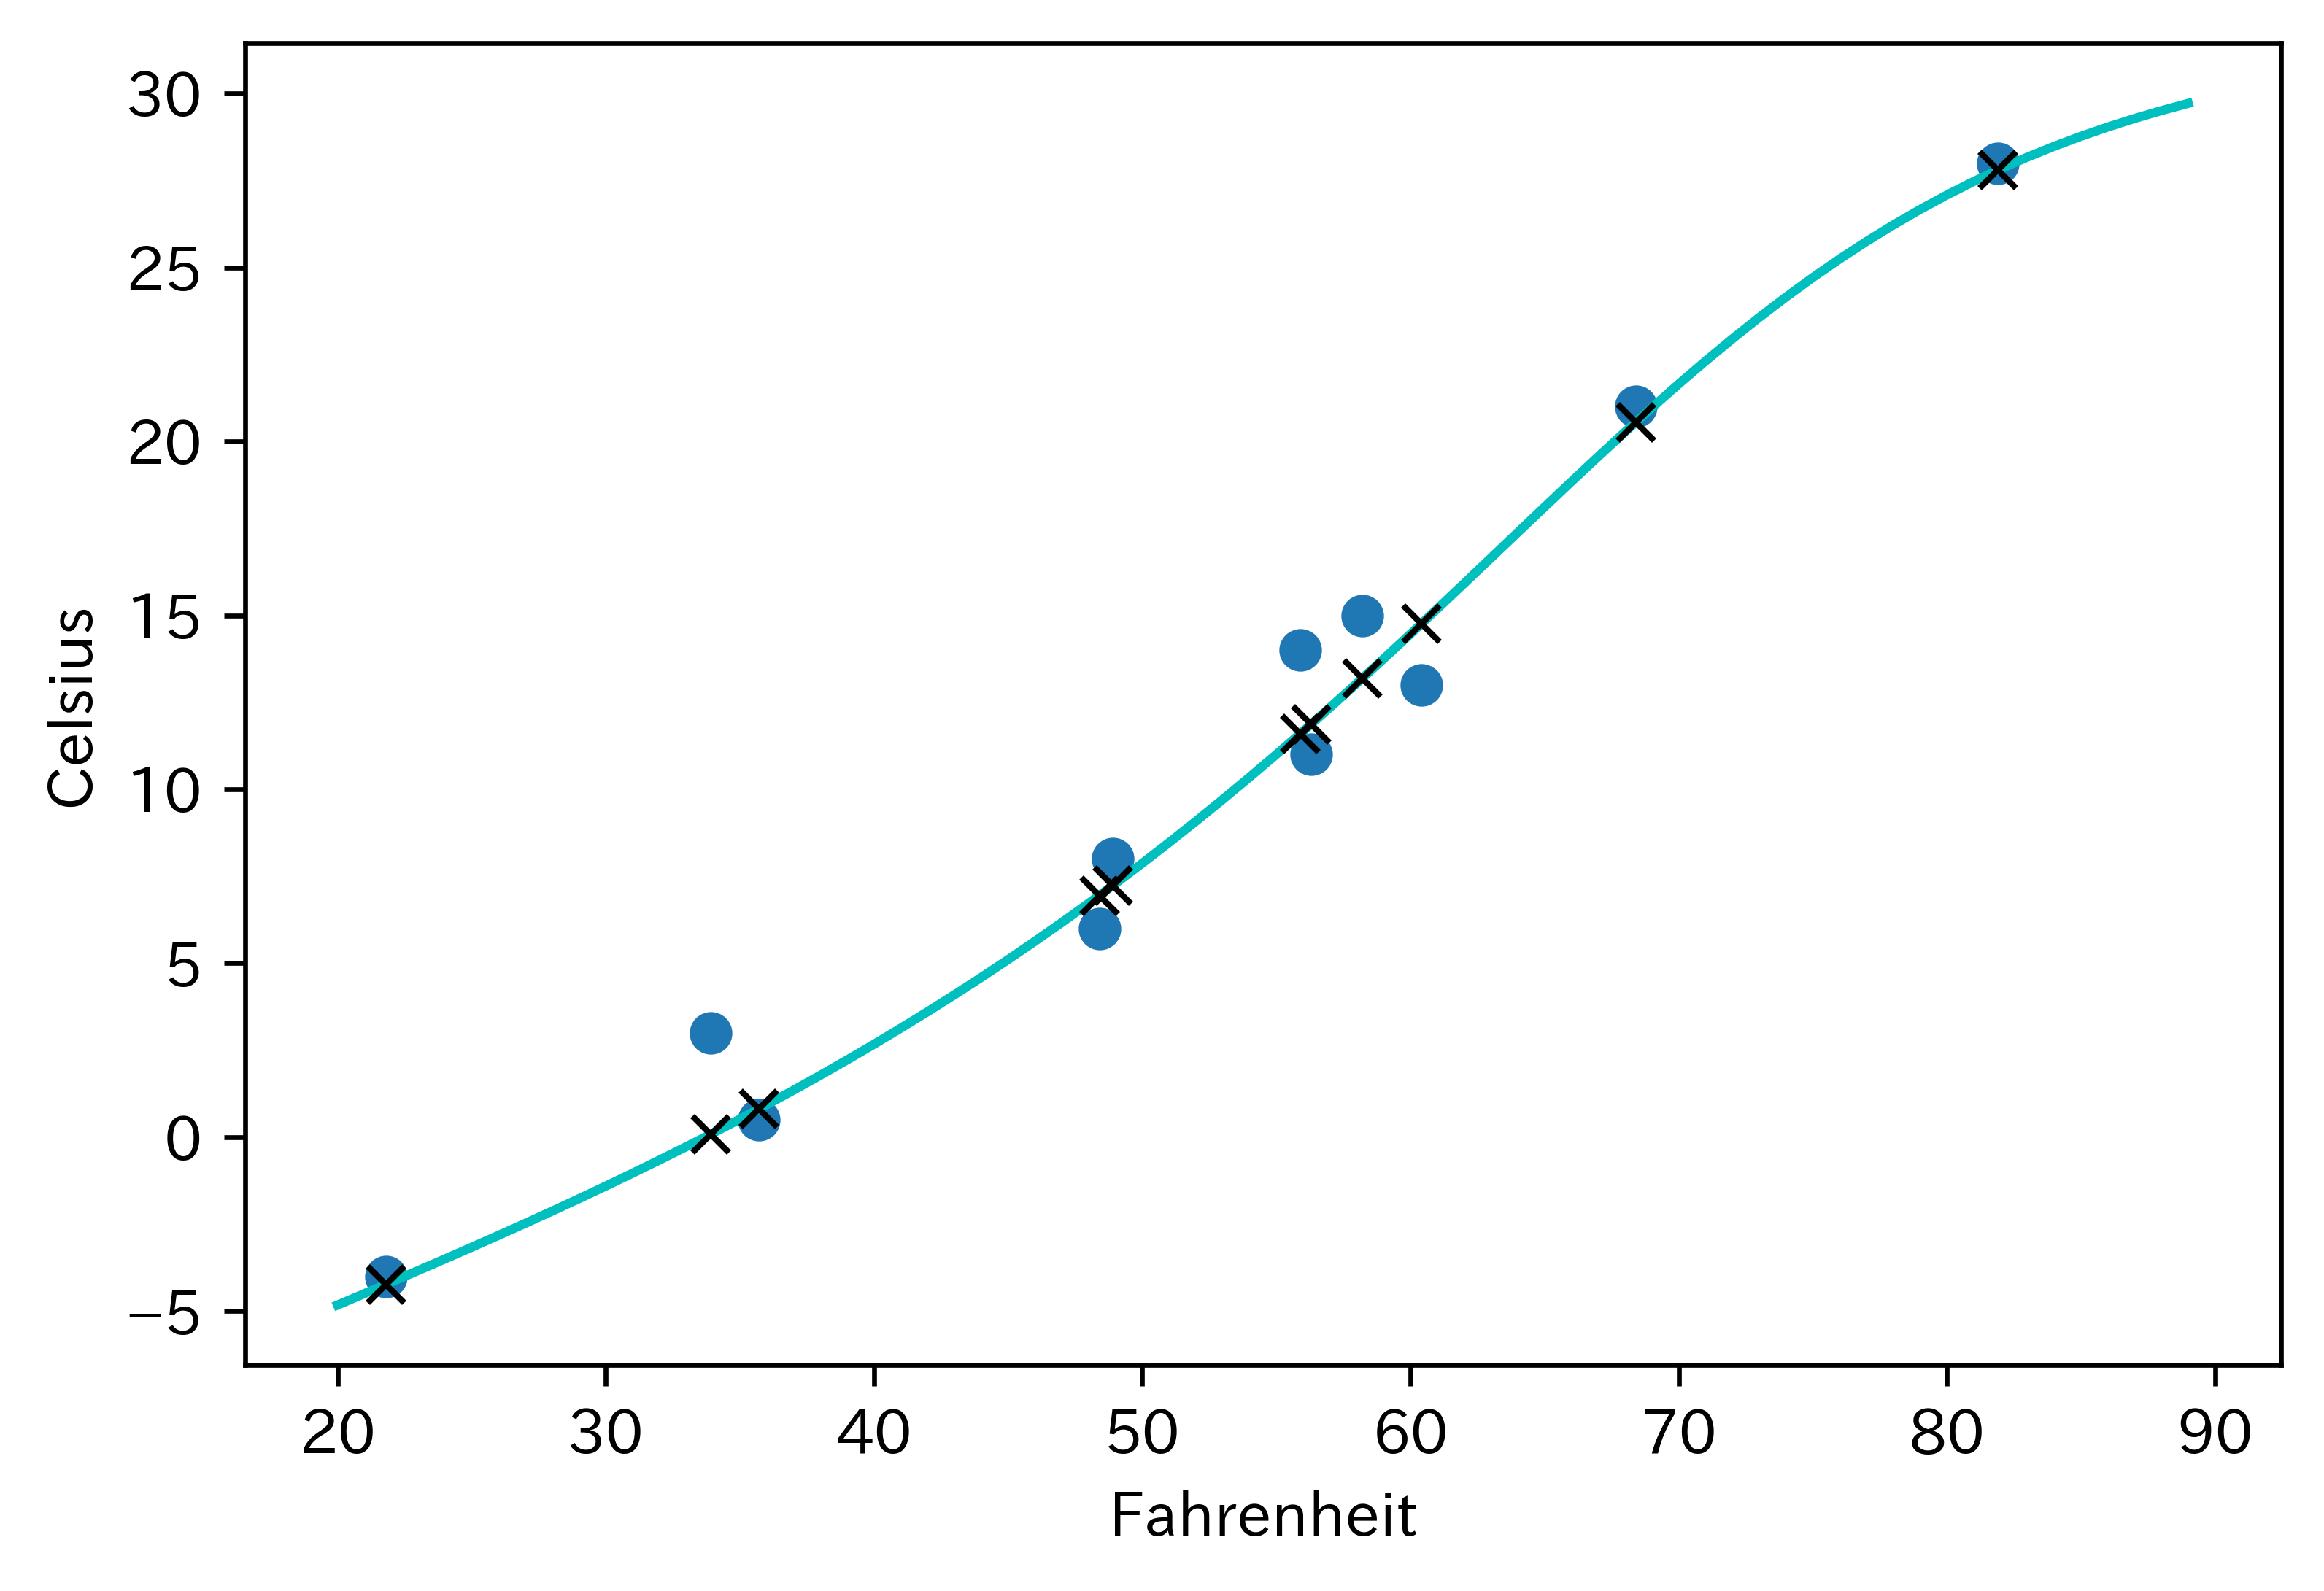

In [22]:
from matplotlib import pyplot as plt

t_range = torch.arange(20., 90.).unsqueeze(1)

fig = plt.figure(dpi=600)

plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.plot(t_u.numpy(), t_c.numpy(),  "o")
plt.plot(t_range.numpy(), seq_model(0.1 * t_range).detach().numpy(), "c-")
plt.plot(t_u.numpy(), seq_model(0.1 * t_u).detach().numpy(), "kx")

いい結果ではあるが、本での結果以上に線形になるような結果は得られなかった

## (b)
隠れ層を増やして表現力を増やし、学習ループを増やせばいい。

In [26]:
from collections import OrderedDict

seq_model = nn.Sequential(OrderedDict([
    ("hidden_linear", nn.Linear(1, 10000)),
    ("hidden_activation", nn.Tanh()),
    ("output_linear", nn.Linear(10000, 1))
]))

In [27]:
optimizer = optim.SGD(seq_model.parameters(), lr=1e-4)

training_loop(
    n_epochs = 50000,
    optimizer = optimizer,
    model = seq_model,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val,
    t_c_train = t_c_train,
    t_c_val = t_c_val)

print("output", seq_model(t_un_val))
print("answer", t_c_val)
print("hidden", seq_model.hidden_linear.weight.grad)

Epoch 1, Training loss 203.9748, Validation loss 117.9936
Epoch 1000, Training loss 3.3202, Validation loss 6.7886
Epoch 2000, Training loss 1.7967, Validation loss 9.7708
Epoch 3000, Training loss 1.5938, Validation loss 10.6559
Epoch 4000, Training loss 1.5419, Validation loss 10.7461
Epoch 5000, Training loss 1.5097, Validation loss 10.5850
Epoch 6000, Training loss 1.4830, Validation loss 10.3581
Epoch 7000, Training loss 1.4597, Validation loss 10.1244
Epoch 8000, Training loss 1.4392, Validation loss 9.9015
Epoch 9000, Training loss 1.4213, Validation loss 9.6937
Epoch 10000, Training loss 1.4057, Validation loss 9.5015
Epoch 11000, Training loss 1.3919, Validation loss 9.3241
Epoch 12000, Training loss 1.3799, Validation loss 9.1603
Epoch 13000, Training loss 1.3694, Validation loss 9.0090
Epoch 14000, Training loss 1.3601, Validation loss 8.8692
Epoch 15000, Training loss 1.3521, Validation loss 8.7399
Epoch 16000, Training loss 1.3450, Validation loss 8.6203
Epoch 17000, Train

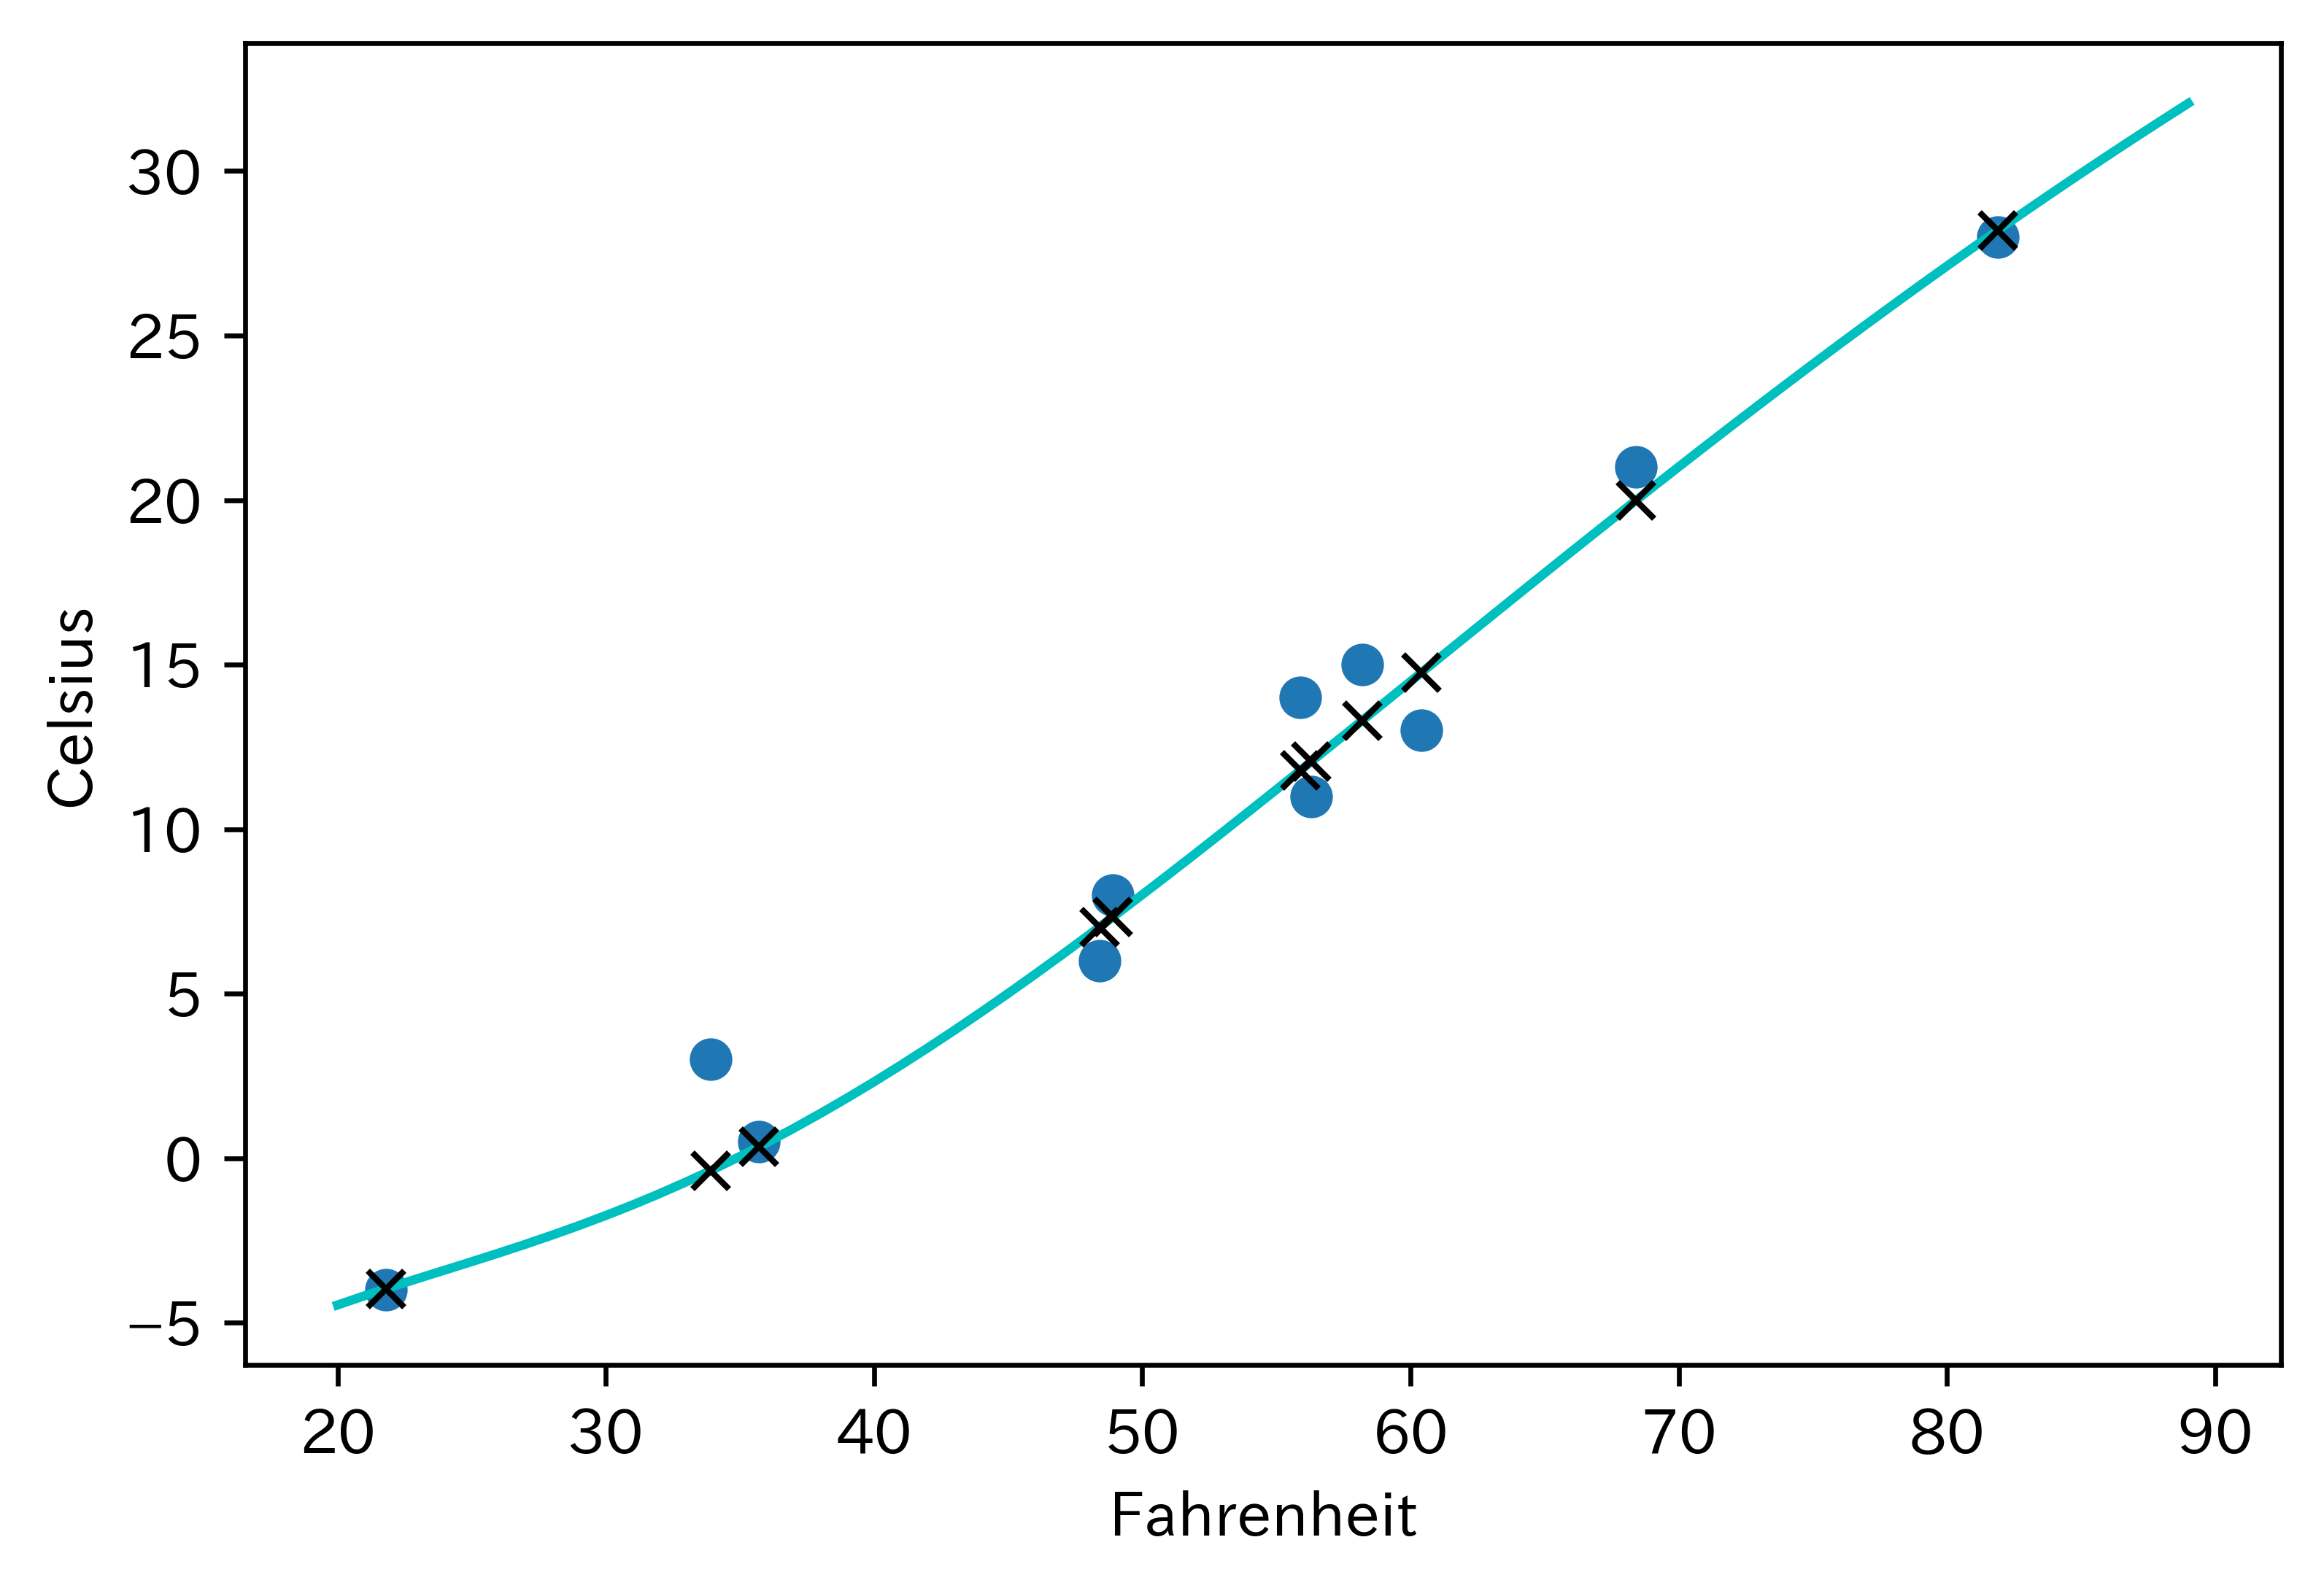

In [28]:
from matplotlib import pyplot as plt

t_range = torch.arange(20., 90.).unsqueeze(1)

fig = plt.figure(dpi=600)

plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.plot(t_u.numpy(), t_c.numpy(),  "o")
plt.plot(t_range.numpy(), seq_model(0.1 * t_range).detach().numpy(), "c-")
plt.plot(t_u.numpy(), seq_model(0.1 * t_u).detach().numpy(), "kx")

過学習しているが、今回の例ではそんなに悪くはないように見える

# 2
## (a)

In [29]:
import csv
import numpy as np
wine_path = "data/winequality-white.csv"
wineq_numpy = np.loadtxt(wine_path, dtype=np.float32, delimiter=";",skiprows=1)
wineq_numpy

array([[ 7.  ,  0.27,  0.36, ...,  0.45,  8.8 ,  6.  ],
       [ 6.3 ,  0.3 ,  0.34, ...,  0.49,  9.5 ,  6.  ],
       [ 8.1 ,  0.28,  0.4 , ...,  0.44, 10.1 ,  6.  ],
       ...,
       [ 6.5 ,  0.24,  0.19, ...,  0.46,  9.4 ,  6.  ],
       [ 5.5 ,  0.29,  0.3 , ...,  0.38, 12.8 ,  7.  ],
       [ 6.  ,  0.21,  0.38, ...,  0.32, 11.8 ,  6.  ]], dtype=float32)

In [30]:
col_list = next(csv.reader(open(wine_path), delimiter=";"))

wineq_numpy.shape, col_list

((4898, 12),
 ['fixed acidity',
  'volatile acidity',
  'citric acid',
  'residual sugar',
  'chlorides',
  'free sulfur dioxide',
  'total sulfur dioxide',
  'density',
  'pH',
  'sulphates',
  'alcohol',
  'quality'])

In [31]:
wineq = torch.from_numpy(wineq_numpy)

wineq.shape, wineq.dtype

(torch.Size([4898, 12]), torch.float32)

In [32]:
data = wineq[:, :-1] # 最後の列以外を選択
data, data.shape

(tensor([[ 7.0000,  0.2700,  0.3600,  ...,  3.0000,  0.4500,  8.8000],
         [ 6.3000,  0.3000,  0.3400,  ...,  3.3000,  0.4900,  9.5000],
         [ 8.1000,  0.2800,  0.4000,  ...,  3.2600,  0.4400, 10.1000],
         ...,
         [ 6.5000,  0.2400,  0.1900,  ...,  2.9900,  0.4600,  9.4000],
         [ 5.5000,  0.2900,  0.3000,  ...,  3.3400,  0.3800, 12.8000],
         [ 6.0000,  0.2100,  0.3800,  ...,  3.2600,  0.3200, 11.8000]]),
 torch.Size([4898, 11]))

In [36]:
target = wineq[:, -1] # 最後の列のみ選択
target, target.shape

(tensor([6., 6., 6.,  ..., 6., 7., 6.]), torch.Size([4898]))

全部数値データでありカテゴリカルにする必要もないのでこのまま学習させていく。  
まずは訓練データとテストデータの分割

In [37]:
n_samples = data.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

data_train = data[train_indices]
target_train = target[train_indices]

data_val = data[val_indices]
target_val = target[val_indices]

In [47]:
seq_model = nn.Sequential(OrderedDict([
    ("hidden_linear", nn.Linear(data.shape[1], 200)),
    ("hidden_activation", nn.Tanh()),
    ("output_linear", nn.Linear(200, 1))
]))

optimizer = optim.SGD(seq_model.parameters(), lr=1e-3)

training_loop(
    n_epochs = 50000,
    optimizer = optimizer,
    model = seq_model,
    loss_fn = nn.MSELoss(),
    t_u_train = data_train,
    t_u_val = data_val,
    t_c_train = target_train,
    t_c_val = target_val)

print("output", seq_model(data_val))
print("answer", target_val)
print("hidden", seq_model.hidden_linear.weight.grad)

Epoch 1, Training loss 34.0358, Validation loss 34.4187
Epoch 1000, Training loss 0.7962, Validation loss 0.7592
Epoch 2000, Training loss 0.7940, Validation loss 0.7588
Epoch 3000, Training loss 0.7931, Validation loss 0.7587
Epoch 4000, Training loss 0.7925, Validation loss 0.7587
Epoch 5000, Training loss 0.7921, Validation loss 0.7587
Epoch 6000, Training loss 0.7919, Validation loss 0.7587
Epoch 7000, Training loss 0.7916, Validation loss 0.7586
Epoch 8000, Training loss 0.7915, Validation loss 0.7586
Epoch 9000, Training loss 0.7914, Validation loss 0.7586
Epoch 10000, Training loss 0.7913, Validation loss 0.7586
Epoch 11000, Training loss 0.7912, Validation loss 0.7586
Epoch 12000, Training loss 0.7911, Validation loss 0.7586
Epoch 13000, Training loss 0.7911, Validation loss 0.7586
Epoch 14000, Training loss 0.7910, Validation loss 0.7586
Epoch 15000, Training loss 0.7910, Validation loss 0.7586
Epoch 16000, Training loss 0.7910, Validation loss 0.7586
Epoch 17000, Training los

厳密に計測はしていないが、10倍くらいかかっている印象

## (b)
単純に入力のパラメータが増え、それに比例してパラメータも増えたため、訓練時間に差ができたと考えられる。　　
  
## (c)  
printで出力した通り  
lossは減ってはいるが、予測と全て5点台となっていることから、あまり額数がうまくいってないことが想像される。
  
## (d)
各パラメータごとに横軸にパラメータ縦軸に評価値をとってグラフ化する  
パラメータ多すぎると見にくいため、主成分分析などを行なってパラメータを集約することも考えられる。